========================================================================================

# Task 6: K-Nearest Neighbors (KNN) Classification - Iris Dataset

========================================================================================

## Step 1: Install Required Libraries

In [1]:
!pip install seaborn

## Step 2: Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from google.colab import files

## Step 3: Upload Dataset

In [5]:
uploaded = files.upload()
df = pd.read_csv("Iris.csv")

Saving Iris.csv to Iris (1).csv


## Step 4: Dataset Overview

In [6]:
print("Dataset Shape:", df.shape)
display(df.head())

Dataset Shape: (150, 6)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Step 5: Check Missing Values

In [7]:
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


## Step 6: Split Features & Target

In [9]:
X = df.drop("Species", axis=1)  # Features
y = df["Species"]              # Target

## Step 7: Normalize Features (Important for KNN)

In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Step 8: Train-Test Split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

## Step 9: Train KNN Model with Different K Values

In [12]:
k_values = range(1, 11)
accuracies = []

In [13]:
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"K={k} -> Accuracy: {acc:.4f}")

K=1 -> Accuracy: 1.0000
K=2 -> Accuracy: 1.0000
K=3 -> Accuracy: 1.0000
K=4 -> Accuracy: 1.0000
K=5 -> Accuracy: 1.0000
K=6 -> Accuracy: 1.0000
K=7 -> Accuracy: 1.0000
K=8 -> Accuracy: 1.0000
K=9 -> Accuracy: 1.0000
K=10 -> Accuracy: 1.0000


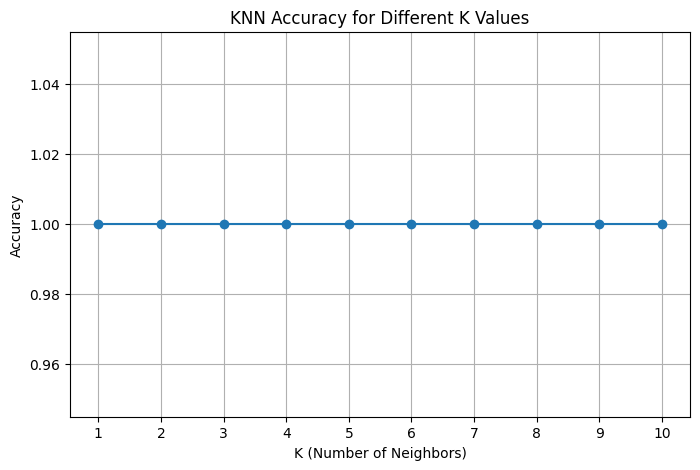

In [14]:
# Plot Accuracy vs K
plt.figure(figsize=(8,5))
plt.plot(k_values, accuracies, marker='o')
plt.title("KNN Accuracy for Different K Values")
plt.xlabel("K (Number of Neighbors)")
plt.ylabel("Accuracy")
plt.xticks(k_values)
plt.grid(True)
plt.show()

## Step 10: Choose Best K & Evaluate Model

In [16]:
best_k = k_values[accuracies.index(max(accuracies))]
print(f"\nBest K: {best_k}")


Best K: 1


In [17]:
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)
y_pred_best = knn_best.predict(X_test)

In [18]:
print("\nFinal Model Accuracy:", accuracy_score(y_test, y_pred_best))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))


Final Model Accuracy: 1.0

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



## Step 11: Visualize Decision Boundaries (for 2 features only)

In [19]:
# We'll use only first two features for visualization
X_vis = X_scaled[:, :2]
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(
    X_vis, y, test_size=0.2, random_state=42
)

In [20]:
knn_vis = KNeighborsClassifier(n_neighbors=best_k)
knn_vis.fit(X_train_vis, y_train_vis)

KNeighborsClassifier(n_neighbors=1)

In [21]:
# Create meshgrid
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

In [22]:
# Predict for each mesh point
Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = pd.Categorical(Z).codes.reshape(xx.shape)

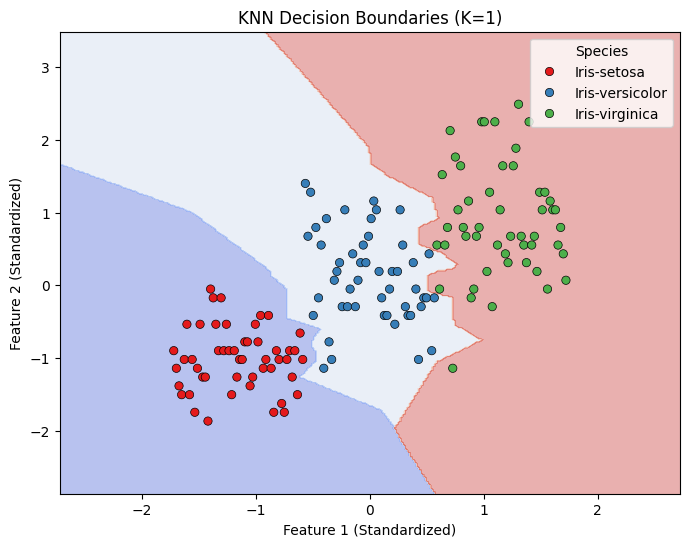

In [23]:
plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap='coolwarm')
sns.scatterplot(x=X_vis[:, 0], y=X_vis[:, 1], hue=y, palette="Set1", edgecolor="k")
plt.title(f"KNN Decision Boundaries (K={best_k})")
plt.xlabel("Feature 1 (Standardized)")
plt.ylabel("Feature 2 (Standardized)")
plt.show()